In [18]:
import pandas as pd
import xgboost as xgb
from sklearn import tree, linear_model, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [5]:
trainData = pd.read_csv("C:\\Users\\g47527\\code\\data-science\\kaggle\\titanic\\data\\train.csv",
                converters={"Sex": lambda s: int(s=="male")})
trainData.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [58]:
trainData.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex                bool
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Male               bool
dtype: object

In [9]:
trainData["Pclass"] = trainData["Pclass"].astype("category")
trainData["isMale"] = trainData["Sex"].astype("bool")
trainData.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
isMale             bool
dtype: object

In [63]:
trainData.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
trainData.describe(include=["O","category", "bool"])

,Pclass,Name,Sex,Ticket,Cabin,Embarked,Male
count,891,891,891,891,204,889,891
unique,3,891,2,681,147,3,2
top,3,"Padro y Manent, Mr. Julian",True,CA. 2343,B96 B98,S,True
freq,491,1,577,7,4,644,577


In [57]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",True,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",True,35.0,0,0,373450,8.0500,NaN,S,True


In [4]:
trainData.groupby("Survived")["Survived"].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

## Decision Tree

In [59]:
Xtrain = trainData.drop(columns=["Name", "Ticket", "Cabin", "Embarked", "PassengerId", "Fare"]).dropna()
ytrain = Xtrain["Survived"]
Xtrain = Xtrain.drop(columns=["Survived"])
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, Xtrain, ytrain, cv=5)
scores


array([0.6993007 , 0.81818182, 0.76923077, 0.81818182, 0.83098592])

In [60]:
clf =  clf.fit(Xtrain, ytrain)
tree.export_graphviz(clf, "tree.dot", feature_names=Xtrain.columns)
!dot -Tpng tree.dot -o tree.png

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
dtype: object

## Linear Regression

In [24]:
Xtrain = trainData[["Survived","Pclass","Sex","Age","SibSp","Parch", "Fare"]].dropna()
ytrain = Xtrain["Survived"]
Xtrain = Xtrain.drop(columns=["Survived"])
clf = linear_model.LinearRegression()
scores = cross_val_score(clf, Xtrain, ytrain, cv=5)
scores


array([0.31004015, 0.36789479, 0.38145908, 0.33389285, 0.42853914])

## Random Forest

In [28]:
Xtrain = trainData.drop(columns=["Name", "Ticket", "Cabin", "Embarked"]).dropna()
ytrain = Xtrain["Survived"]
Xtrain = Xtrain.drop(columns=["Survived"])
clf = RandomForestClassifier(n_estimators=20)
scores = cross_val_score(clf, Xtrain, ytrain, cv=5)
scores

array([0.68531469, 0.82517483, 0.83216783, 0.77622378, 0.83802817])

## Support Vector Machine

In [34]:
Xtrain = trainData.drop(columns=["Name", "Ticket", "Cabin", "Embarked"]).dropna()
ytrain = Xtrain["Survived"]
Xtrain = Xtrain.drop(columns=["Survived"])
clf = svm.SVC(gamma="scale", kernel="poly")
scores = cross_val_score(clf, Xtrain, ytrain, cv=5)
scores

array([0.59440559, 0.62237762, 0.62237762, 0.67832168, 0.68309859])

## XGBoost

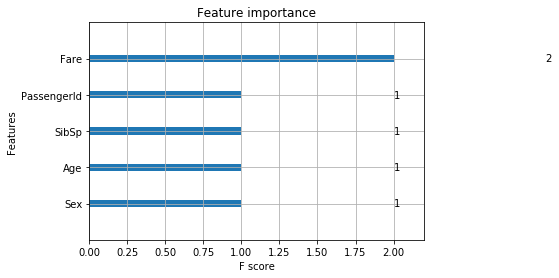

In [20]:
Xtrain = trainData.drop(columns=["Name", "Ticket", "Cabin", "Embarked", "Pclass"]).dropna()
ytrain = Xtrain["Survived"]
Xtrain = Xtrain.drop(columns=["Survived"])
dTrain = xgb.DMatrix(Xtrain, label=ytrain)
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
clf = xgb.train(param, dTrain, num_round)
xgb.plot_importance(clf)

In [8]:
testData = pd.read_csv("C:\\Users\\g47527\\code\\data-science\\titanic\\test.csv",
                converters={"Sex": lambda s: int(s=="male")})
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
Xtest = testData.drop(columns=["Name", "Ticket", "Cabin", "Embarked"]).dropna()
ytest = Xtest["Survived"]
Xtest = Xtest.drop(columns=["Survived"])
clf.score(Xtest,ytest)

1.0